## Nupack Analysis Code 

nupack-4.0.0.26

Nupack download: http://www.nupack.org/downloads

Nupack documentation: https://piercelab-caltech.github.io/nupack-docs/analysis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from datetime import datetime
from nupack import *

## Supporting functions 

In [2]:
def make_list(concentration_A):
    """This puts concentration_A in a list.
       Input: Numerical input. Can be list of/or int/float
       Output: list of concentration_A
    """
    return [concentration_A] if not isinstance(concentration_A, list) else concentration_A

def is_string(nucleic_acid_type):
    """This puts nucleic_acid_type and checks it as a string.
       Input: String input. Can be 'rna' or 'dna'
       Output:
    """
    if not isinstance(nucleic_acid_type, str):
        nucleic_acid_type = str(nucleic_acid_type).lower()
    return nucleic_acid_type

def print_strands(A,B):
    """This prints two strands of nucleotides.
       Input: Two string inputs representing nucleotide sequences.
       Output: Two printed strings showing the 5' and 3' ends of each strand.
    """
    print(f"5'-{A}-3'")
    print(f"3'-{B}-5'")

# def is_nucleic_acid(nucleic_acid_type):
#     """This puts nucleic_acid_type and checks it as a  A,T,G,C,U .
#        Input: String input. Can be 'rna' or 'dna'
#        Output:
#     """
#     nucleic_acid_type
        #are any of these string characters not is my list of nucleobases


#     concentration_A = is_list(concentration_A)

def report_parameters(results):
    """This reports the number of conditions and returns the keys of a dictionary.
       Input: A dictionary `results` with condition names as keys.
       Output: Prints the number of conditions and returns a list of the condition names.
    """
    print(f"{len(results)} number of conditions")
    return list(results.keys())

def report_summary(results, index_number):
    """This reports a summary of a specific condition based on its index and returns its corresponding value from a dictionary.
       Input: A dictionary `results` with condition names as keys, and an integer `index_number` representing the index of the condition to report.
       Output: Prints a summary of the specified condition and returns its corresponding value from the dictionary.
    """
    index = report_parameters(results)
    condition = index[index_number]
    print(f"Summary of condition '{condition}': {results[condition]}")
    return results[condition]



def convertK_to_C(tempK):
    """Converts temperature in Kelvin to Celsius and returns the result rounded to the nearest integer.
       Input: A temperature `tempK` in Kelvin.
       Output: The converted temperature `tempC` in Celsius rounded to the nearest integer.
    """
    return round(tempK - 273.15)

def print_tempC(temperature_C):
    """Reports the number of temperatures being evaluated.
       Input: A list of temperature values in Celsius.
       Output: Prints the number of temperature values being evaluated.
    """
    print(f"Number of temperatures being evaluated: {len(temperature_C)}")


def print_tubes(tubes):
    """Reports the number of tube conditions being evaluated.
       Input: A list of tube conditions.
       Output: Prints the number of tube conditions being evaluated.
    """
    num_tubes = len(make_list(tubes)[0])
    print(f"Number of tubes being evaluated: {num_tubes}")

def make_list(concentration_A):
    """This puts concentration_A in a list.
       Input: Numerical input. Can be list of/or int/float
       Output: list of concentration_A
    """
    if not isinstance(concentration_A, list):
        concentration_A = [concentration_A]
    elif isinstance(concentration_A, list):
        pass
    return concentration_A

    
def is_string(nucleic_acid_type):
    """This puts nucleic_acid_type and checks it as a string.
       Input: String input. Can be 'rna' or 'dna'
       Output: 
    """
    if not isinstance(nucleic_acid_type, str):

        try:
            nucleic_acid_type = str(nucleic_acid_type.lower())
        except:
            print("Check nucleic_acid is a string")
            pass
    else:
        pass

    return nucleic_acid_type
    
def print_strands(A,B):
    print("5'-"+str(A)+"-3'")
    print("3'-"+str(B)+"-5'")
    
# def is_nucleic_acid(nucleic_acid_type):
#     """This puts nucleic_acid_type and checks it as a  A,T,G,C,U .
#        Input: String input. Can be 'rna' or 'dna'
#        Output: 
#     """
#     nucleic_acid_type
        #are any of these string characters not is my list of nucleobases
    
    
#     concentration_A = is_list(concentration_A)

def report_parameters(Results):
    print(str(len(Results.keys())) + ' number of conditions')
    index = list(Results.keys())
    return index

def report_summary(Results, indexbyNumber):
    index = report_parameters(Results)
    print(index[indexbyNumber])
    return Results[index[indexbyNumber]]


def convertK_to_C(tempK):
    """ Converts temp in kelvin to temp in Celsius
    """
    tempC = tempK-273.14
    return round(tempC)

def print_tempC(temperature_C):
    """Reports number of temperatures being evaluated
        Input: temperature_C
    """
    print("Number of temps: "+str(len(temperature_C)))

def print_tubes(tubes):
    """Reports number of tube conditions being evaluated
        Input: tubes
    """
    tubes_ = make_list(tubes)
    print("Number of tubes: "+str(len(tubes_[0])))   ##### debugging


def convert_copy_number_to_concentration(sampleSize_uL=25, target_number=1000):
    """Gets molar concentration of target in solution
        Input: sampleSize in μL, estimated target molecule amount
        Output: target_concentration molarity (M)
    """
    NA = 6.022e23 # Avogadros number (mol^-1)
#     '{:.2g}'.format(sampleSize)
    sampleSize_L = sampleSize_uL*1e-06 # Convert sample size to L
    target_conc = target_number/(sampleSize_L*NA) # convert concentration to molarity
    return float('{:.3g}'.format(target_conc))

def convert_concentration_to_copy_number(Concentration_M, sampleSize_uL=25):
    """Finds copy number from molarity of target in solution
        Input: sampleSize in μL, estimated target molecule amount
        Output: copy number
    """
    NA = 6.022e23 # Avogadros number (mol^-1)
    sampleSize_L = float(sampleSize_uL)*1e-06 # Convert sample size to L
    copyNumber = float(Concentration_M)*sampleSize_L*NA
    return round(float('{:.1g}'.format(copyNumber)),2)
    
    
    
def save_fig(fig, name='NUPACK_Results'):
    """ Saviing the figure
        Input: fig object and figure name
        Output: Saved png figure
    """
    date = datetime.now()
    date_str = str(date)[0:-7]
    fig.savefig(name+date_str+'.png',dpi=100,bbox_inches='tight')
    return print("Figure saved")
# save_fig(fig, name)

## Function for building a model.
### Parameters: nucleic acid material, temperatures, & salt concetrations

In [3]:
def models_maker(nucleic_acid_type='dna', temperature_C=37, Na_M=0.05, Mg_M=0):
    """Input: material: (DNA as 'dna' or RNA as 'rna'), 
              temperature (C): temperatures to evaluate as list
              sodium [Na+]: in Molarity (M), (Ex: 1e-9) aka 1nM. Minimum = 0.05
              magnesium [Mg++]: in Molarity (M), (Ex: .000001) aka μM 
              Note: This function is set up for only RNA salt concentrations.
              DNA would also need potassium and ammonium. Not sure how to get that functionality
              
       Output: Models for each temperature.
    """
    if not isinstance(Na_M,list):
        if Na_M < 0.05:
            print('Minimum [Na] >= 0.05')
            Na_M = 0.05
        else:
            pass
    
    else:
        pass
        
    oligonucleotide = is_string(nucleic_acid_type).lower()
    models = {} # collection of models based on temperature
    i = 0
    for temp in make_list(temperature_C):
#         print(temp)
#         print(oligonucleatide)
        label = str(temp)+'C, '+'Na+: '+str(Na_M)+'M, '+' Mg++: '+str(Mg_M)+'M, '
        models[label] = Model(material=oligonucleotide, celsius=temp, sodium=Na_M, magnesium=Mg_M) # salt concentrations in M
        i+=1
    
    
    # check if list
    if not isinstance(temperature_C, list):
        temperature_C = [temperature_C]
    elif isinstance(temperature_C, list): 
        pass 
    else:
        pass
    
#     print("Number of temps: "+str(len(temperature_C)))   ##### debugging
#     print_tempC(temperature_C)
    return models


## Example
# default 'rna', 37, 1, 0
# models = models()

# temperatureC = [35, 36, 37, 38, 39, 40, 41, 42]
# models = models_maker('rna', 37,0.05,0)
# print(len(models))
# models


## Function for specifying strands for the model.
   ### User inputs 5' only.

In [4]:
# import logging
#
# def specify_strands(fiveprime_strand):
#     """Create two Strand objects from the input strand sequence.
#
#     Args:
#         fiveprime_strand (str): A string of nucleotides (A, T, G, C) representing the 5' end of the DNA or RNA sequence.
#
#     Returns:
#         A tuple containing two Strand objects, one for the input strand and one for the complementary strand.
#     """
#     logging.info("Input strand: %s", fiveprime_strand)
#
#     complement = {"A": "T", "T": "A", "G": "C", "C": "G", "U": "A"}
#     threeprime_strand = "".join([complement[nb.upper()] for nb in fiveprime_strand])
#
#     if "U" in fiveprime_strand:
#         strand_A = Strand(fiveprime_strand, name="Strand A (RNA)")
#         strand_B = Strand(threeprime_strand, name="Strand B (RNA)")
#     elif "T" in fiveprime_strand:
#         strand_A = Strand(fiveprime_strand, name="Strand A (DNA)")
#         strand_B = Strand(threeprime_strand, name="Strand B (DNA)")
#     else:
#         logging.warning("Input strand does not contain T or U, treating as DNA.")
#         strand_A = Strand(fiveprime_strand, name="Strand A (DNA)")
#         strand_B = Strand(threeprime_strand, name="Strand B (DNA)")
#
#     logging.info("Strand A: %s", strand_A)
#     logging.info("Strand B: %s", strand_B)
#
#     return strand_A, strand_B

def specify_strands(fiveprime_strand):
    """fiveprime_strand: Needs to be string of A's, T's, G's, C's:
    """
    threeprime_strand = ''
    if "U" not in fiveprime_strand and "T" in fiveprime_strand:
        for nb in fiveprime_strand:

            if nb.upper() == 'A':
                threeprime_strand = threeprime_strand + 'T'
            elif nb.upper() == 'T':
                threeprime_strand = threeprime_strand + 'A'
            elif nb.upper() == 'G':
                threeprime_strand = threeprime_strand + 'C'
            elif nb.upper() == 'C':
                threeprime_strand = threeprime_strand + 'G'
            else:
                pass

    elif "U" in fiveprime_strand and "T" not in fiveprime_strand:
        for nb in fiveprime_strand:
            if nb.upper() == 'A':
                threeprime_strand = threeprime_strand + 'U'
            elif nb.upper() == 'U':
                threeprime_strand = threeprime_strand + 'A'
            elif nb.upper() == 'G':
                threeprime_strand = threeprime_strand + 'C'
            elif nb.upper() == 'C':
                threeprime_strand = threeprime_strand + 'G'
            else:
                pass
    else:
        print('It looks like there is a mix up with RNA and DNA. Check inputs')

    print(fiveprime_strand)
    print(threeprime_strand)
    A = Strand(fiveprime_strand, name='Strand A')
    B = Strand(threeprime_strand, name='Strand B')

#     print("5'-"+str(A)+"-3'") # Can be used for debugging.
#     print("3'-"+str(B)+"-5'") #
    print_strands(A,B)
    return A,B

## Example
# A, B = specify_strands('ATGC')
# A,B
# 

### Get the nucleotide length of a strand

In [5]:
#
# A.nt()

### This is a weird issue I am having where DNA is converted to RNA by the "Strand" function.
I don't know what is causing it or why.

In [6]:
## Note: the nupacks model function use in this function. 
#model__ = models_maker('dna', 37,0.05,0)

In [7]:
#str(Strand("ATTTTTTTTTTGCATC", name='Strand B'))

## Function for setting up reaction tubes with specific concentrations of probes(A) & targets(B)

In [8]:
def specify_tube(A, B, concentration_A=1e-09, concentration_B=1e-09, setSpec=2): # name=''
    """Inputs: A & B are <Strand Strand A>, can be list, must be same size
               concentrations as molar: e.g. input 1e-9 as 1nm
               setSpec: int(), all complexes of up to 2 strands
               name: string of tube name/number. 
       Output: tube object and complexes object
    """
    
    # check if list
    concentration_A = make_list(concentration_A)
    concentration_B = make_list(concentration_B)
    
    tubes = {}
    i = 0 # counter
    for concA in concentration_A:
        for concB in concentration_B:
            tube_name = 'A: '+str(concA)+'M, '+' B: '+str(concB)+'M'
            tubes[str(tube_name)] = Tube(strands={A: concA, B: concB},
            complexes=SetSpec(max_size=2), name=tube_name) # all complexes of up to 2 strands
            i+=1 
            

#     tubes_ = make_list(tubes)
#     print("Number of tubes: "+str(len(tubes_[0])))   ##### used for debugging

    print_tubes(tubes)
    return tubes


## Example
# concentration_A = [1e-9, 2e-9, 3e-9, 4e-9]
# concentration_B = [1e-9, 2e-9, 3e-9, 5e-9]
# t1 = specify_tube(A, B, concentration_A, concentration_B)  

# t1 = specify_tube(A, B)  
# t1 

## Function for analyzing the model and reation tubes

In [9]:
def analysis_job(tubes, models):
    """Input: tubes: <Tube Tube 1>, can be list of tubes
              models: <nupack.model.Model at XXXX>, can be dictionary
       Output: results from analysis: partition func, ΔG(kcal/mol),concnetration results 
    """
    
    # convert dict or object to list
    if isinstance(models, dict):
        models_list = list(models.values())
    elif not isinstance(models, list):
        models_list = [models]
    else:
        pass
    
    # convert dict or object to list
    if isinstance(tubes, dict):
        tubes_list = list(tubes.values())
    elif not isinstance(tubes, list): 
        tubes_list = [tubes]
    else:
        pass
    
    results = {}
    
    i = 0 # counter
    
    for model in models_list:
        label = str(list(models.keys())[i])
        
        ii = 0
        for tube in tubes_list:
            
            label_full = label + str(list(tubes.keys())[ii])

            results[label_full] = tube_analysis(tubes=[tube], model=model)
    
            ii += 1
        i += 1
    return results
    
## Example
# tubes = t1   
# print(len(tubes))
# results = analysis_job(tubes, models)
# print(str(len(results))+ ' number of conditions')

# key_labels = list(results.keys())
# print(key_labels[0])
# results[key_labels[0]]

In [10]:
def run_analysis(fiveprime_strand='ATGC', nucleic_acid_type='rna', temperature_C=37,
                 Na_M=1, Mg_M=0,  
                 concentration_A=1e-09, concentration_B=3e-09):
    
    """Wrapper function for analysis functions
    """
    # Build models
    models = models_maker(nucleic_acid_type, temperature_C, Na_M, Mg_M) # rna or dna, temp, salt
    
    # Build strands
    A, B = specify_strands(fiveprime_strand) #  (ATGC)
    
    # Build test tubes
    tubes = specify_tube(A, B, concentration_A, concentration_B, setSpec=2) 
    
    return analysis_job(tubes, models)

## Example
# # Basic example
# resultss = run_analysis('ATGC','rna',[40, 45, 50])
# resultss = run_analysis()


# print(str(len(list(resultss.keys())))+ ' number of conditions')
# index = list(resultss.keys())
# print(len(index))
# print(index[0])
# results[index[0]]


# Extracting data from nupack structure objects

## Build a dataframe from nupack results

In [11]:
def make_dataFrame_from_results(Results=pd.DataFrame()): 
    """This function creates a simple dataframe from the Nupack query data. 
        This function is currently static, and should be rewritten to generalize. 
        Inputs: Results from make_dataFrame_from_results()
    """
    column_names = ['Material',
                    'TemperatureC',
                    'Na_molarity (M)',
                    'Mg_molarity (M)',
                    'Complex A Conc (M)',
                    'Complex B Conc (M)',
                    'Complex AA Conc (M)',
                    'Complex AB Conc (M)',
                    'Complex BB Conc (M)',
                    'ΔG A kcal/mol',
                    'ΔG B kcal/mol',
                    'ΔG AA kcal/mol',
                    'ΔG AB kcal/mol',
                    'ΔG BB kcal/mol',                 
                    'Partition func A kcal/mol',
                    'Partition func B kcal/mol',    
                    'Partition func AA kcal/mol',
                    'Partition func AB kcal/mol',
                    'Partition func BB kcal/mol']

    df = pd.DataFrame(columns = column_names)

    for i in range(0,len(list(Results.keys()))):

        t_result = Results[list(Results.keys())[i]].tubes 
        c_result = Results[list(Results.keys())[i]].complexes 

        # dir(c_result[list(c_result.keys())[0]].model)
        
        free_energy_B  = '{:.2g}'.format(c_result[list(c_result.keys())[0]].free_energy)
        free_energy_A  = '{:.2g}'.format(c_result[list(c_result.keys())[1]].free_energy)
        free_energy_AA = '{:.2g}'.format(c_result[list(c_result.keys())[2]].free_energy)
        free_energy_AB = '{:.2g}'.format(c_result[list(c_result.keys())[3]].free_energy)
        free_energy_BB = '{:.2g}'.format(c_result[list(c_result.keys())[4]].free_energy)

        pfunc_B  = '{:.2g}'.format(c_result[list(c_result.keys())[0]].pfunc)
        pfunc_A  = '{:.2g}'.format(c_result[list(c_result.keys())[1]].pfunc)
        pfunc_AA = '{:.2g}'.format(c_result[list(c_result.keys())[2]].pfunc)
        pfunc_AB = '{:.2g}'.format(c_result[list(c_result.keys())[3]].pfunc)
        pfunc_BB = '{:.2g}'.format(c_result[list(c_result.keys())[4]].pfunc)

        ## More options
    #     mfe_B  = c_result[list(c_result.keys())[0]].mfe
    #     mfe_A  = c_result[list(c_result.keys())[1]].mfe
    #     mfe_AA = c_result[list(c_result.keys())[2]].mfe
    #     mfe_AB = c_result[list(c_result.keys())[3]].mfe
    #     mfe_BB = c_result[list(c_result.keys())[4]].mfe

        material = c_result[list(c_result.keys())[0]].model.material
        
        temperatureK = c_result[list(c_result.keys())[0]].model.temperature # In kelvin
        temperatureC = convertK_to_C(temperatureK)

        Na_molarity = c_result[list(c_result.keys())[0]].model.conditions.na_molarity
        Mg_molarity = c_result[list(c_result.keys())[0]].model.conditions.mg_molarity
        
        # Helpful Note:
        # 0 index is complex B
        # 1 index is complex A
        # 2 index is complex A+A
        # 3 index is complex A+B
        # 4 index is complex B+B
        
        concentrations = t_result[list(t_result.keys())[0]].complex_concentrations # iterable
        
        complex_B  = '{:.1g}'.format(concentrations[list(concentrations.keys())[0]])
        complex_A  = '{:.1g}'.format(concentrations[list(concentrations.keys())[1]])
        complex_AA = '{:.2g}'.format(concentrations[list(concentrations.keys())[2]])
        complex_AB = '{:.2g}'.format(concentrations[list(concentrations.keys())[3]])
        complex_BB = '{:.2g}'.format(concentrations[list(concentrations.keys())[4]])
#         print(type(complex_BB)) # str # Check the type


        df.loc[i]=[material, temperatureC, Na_molarity, Mg_molarity,
                   complex_A, complex_B, complex_AA, complex_AB, complex_BB,
                   free_energy_A, free_energy_B, free_energy_AA, free_energy_AB, free_energy_BB,
                   pfunc_A, pfunc_B, pfunc_AA, pfunc_AB, pfunc_BB]
    return df

## Example
# dataFrame_Nupack = make_dataFrame_from_results(Results)
# dataFrame_Nupack = make_dataFrame_from_results()
# dataFrame_Nupack.head(3)

##  Getting data ready for  plotting and graphing

In [12]:
# Building a dictionary of each experimental database

def make_sorted_df(df_Nupack, concentration_A, concentration_B):
    """This function is used to get and sort the same experimental conditions in the df_Nupack
        dataframe, and make a new simple dataframe to be used with plotting. The plotting is 
        specifically set up for "TempC","percent_bound_A","percent_bound_B","AB_Conc_M", "A_Conc_M", "B_Conc_M" 
        but this can be changed at a later date.
        Input: df_Nupack- dataframe of nupack results
        Output: Dataframe of sorted chosen data
    """
    concentration_A = make_list(concentration_A)
    concentration_B =  make_list(concentration_B)
    
    # making the column names easier to handle.
    column_names = ['Material',
                    'TempC',
                    'Na_M',
                    'Mg_M',
                    'A_Conc_M',
                    'B_Conc_M',
                    'AA_Conc_M',
                    'AB_Conc_M',
                    'BB_Conc_M',
                    'ΔG_A',
                    'ΔG_B',
                    'ΔG_AA',
                    'ΔG_AB',
                    'ΔG_BB',                 
                    'Pfunc_A',
                    'Pfunc_B',    
                    'Pfunc_AA',
                    'Pfunc_AB',
                    'Pfunc_BB']

    df_Nupack.columns = column_names # setting column names
    
    conditions = len(df_Nupack.TempC.unique()) # Conditions are #_of_temperatures* #_of_ concentrations
    dfsize = int(df_Nupack.shape[0]) # Shape of the df_Nupack dataframe -> rows
    unique_rows = int(dfsize/conditions) # This is because the data is mixed up and needs to be sorted by the number of unique conditions.

    sorted_df_Nupack = {}
    for i in range(0,unique_rows):
        sorted_df_Nupack[i] = df_Nupack.iloc[i::unique_rows, :] # Splicing out rows for each experiment

    temp_concBound = {}

    # Building a new sorted & simple dictionary for plotting
    # Also adding percent bound of species
    for i in range(0,len(sorted_df_Nupack)):
        sorted_df_Nupack[i].reset_index(inplace = True)
        
        # Making new dataframe to store data I want to graph
        df_temp_concBound = pd.DataFrame(columns = ["TempC",
                                                    "Na_M",
                                                    "Mg_M",
                                                    "percent_bound_A",
                                                    "percent_bound_B",
                                                    "AB_Conc_M", 
                                                    "A_Conc_M", 
                                                    "B_Conc_M" ])
       
        ## Iterating over each set of ordered experiments
        for ii in range(0,len(sorted_df_Nupack[i])):
            TempC = sorted_df_Nupack[i]["TempC"][ii] # Getting temperature
            Na_M = sorted_df_Nupack[i]["Na_M"][ii] # Getting [Na]
            Mg_M = sorted_df_Nupack[i]["Mg_M"][ii]  # Getting [Mg]
            AB_Conc_M = float(sorted_df_Nupack[i]["AB_Conc_M"][ii]) # Getting [AB]
            A_Conc_M = float(sorted_df_Nupack[i]["A_Conc_M"][ii]) # Getting [A]
            B_Conc_M = float(sorted_df_Nupack[i]["B_Conc_M"][ii]) # Getting [B]
            
            # Note: This is an important operation for the outcome of this code
            # These are the percent bound [AB/A] and [AB/B]
            percent_bound_A = ((AB_Conc_M)/float(concentration_A[i]))*100 # [AB/A] 
            percent_bound_B = ((AB_Conc_M)/float(concentration_B[0]))*100 # [AB/B]

            ## Writing new row in the concentration bound dataframe
            df_temp_concBound.loc[ii] = [TempC, Na_M, Mg_M, percent_bound_A, percent_bound_B, AB_Conc_M, A_Conc_M, B_Conc_M]

        # Dictonary for df_temp_concBound values
        temp_concBound[i] = df_temp_concBound
    
    return temp_concBound


## Example
# df_Nupack = dataFrame_Nupack
# temp_concBound = make_sorted_df(df_Nupack, concentration_A, concentration_B)


## Finally, plotting the results

In [13]:

def plot_experiment(temp_concBound, concentration_A, sampleVolume_uL, targetAmount, species="A"):
    """This function plots the analyzed results found from Nupack
        Input: dictionary of temperatures and % bound species, sample volume in μL, 
               target molc amount
        Output: Plot of results
    """
    # handling species input
    if species.upper() == "B":
        dependent_var = '% bound Target (B)'
        bound_species = "percent_bound_B"        
        
    else:
        dependent_var = '% bound Probe (A)'
        bound_species = "percent_bound_A"
    
    # Custom title
    title_seg1 = ("Percent bound ("+str(species)+"). " + str("{:.2e}".format(targetAmount)) + " copies of target in " + 
             str(sampleVolume_uL) + " μL")
    
    # Figure setup
    fig, axes = plt.subplots(figsize=(10,6), nrows=1, ncols=1)

    # Colors to cycle through. I like tab colors because they are unambigious to everyone.
    colors = cycle(['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple',
                    'tab:pink', 'tab:cyan', 'tab:olive', 'tab:brown', 'k'])

    for i in range(0, len(temp_concBound)):
        
        Na_M = temp_concBound[i]["Na_M"]
        Mg_M = temp_concBound[i]["Mg_M"]
        
        flag_1 = True # A generic boolian for formatting new lines in the title bar
        ions = '' # Empty variable for labeling ions
        
        if len(np.unique(Na_M.squeeze())) == 1:
            title_seg2 = '   $Na^+ (M): $' + str(Na_M[i])
#             ions = ions + title_seg2 # part of legend label for Na salts
            
            title = title_seg1 +'.'+ '\n' +  title_seg2
        else:
            flag_1 = False
            ions = ions + title_seg2 # part of legend label for Na salts
            title_seg2 = '   $Na^+ (M): $' + ', '.join(map(str, list(Na_M.squeeze().unique())))
            title = title_seg1 + '\n'+ title_seg2

    
        if len(np.unique(Mg_M.squeeze())) == 1 and flag_1 == True:
            title_seg3 = ' $Mg^{++} (M): $' +  str(Mg_M[i])
            
#             ions = ions + title_seg3 # part of legend label for Na salts
            title = title + '\n' +  title_seg3
        else:
            ions = ions + title_seg3 # part of legend label for Na salts
            title = title + '\n'+ '$Mg^{++} (M): $' + ', '.join(map(str, list(Mg_M.squeeze().unique())))         
    
        legend_label = 'Probe Conc: '+str(concentration_A[i])+' M. '+ions
        
        X = temp_concBound[i]["TempC"]
        Y = (temp_concBound[i][bound_species])
        axes.plot(X,Y, color=next(colors) ,markersize=8, marker='o',fillstyle='none', linewidth=2, label=legend_label)
    axes.set_xlabel('Temperature [C]',fontsize=16)
    axes.set_ylabel(dependent_var,fontsize=16)
    axes.set_title(title,fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
    # Experimenting
#         custom_ticks = range(0,max(concentration_A), 10) 
#         axes.set_yticks(custom_ticks)
#         y_scale = list(range(0,101))
#         y_scale = [str(i) for i in y_scale]

#         axis.set_yticklabels(y_scale,rotation=45)

#         plt.yscale("log")
    fig.tight_layout()
    plt.show()
    return fig

## Example
# specify_strands(fiveprime_strand)

# sampleVolume_uL = 25
# targetAmount = 10000
# # title = "Percent bound target (B). " +str(targetAmount)+" copies of target in "+str(sampleVolume_uL)+"μL" 
# fig = plot_experiment(temp_concBound,concentration_A, sampleVolume_uL, targetAmount,"A")



#  demo

### Putting all it all together in a nice wrapper.


Number of tubes: 1
11 number of conditions
Na+: 0.05M,  Mg++: 


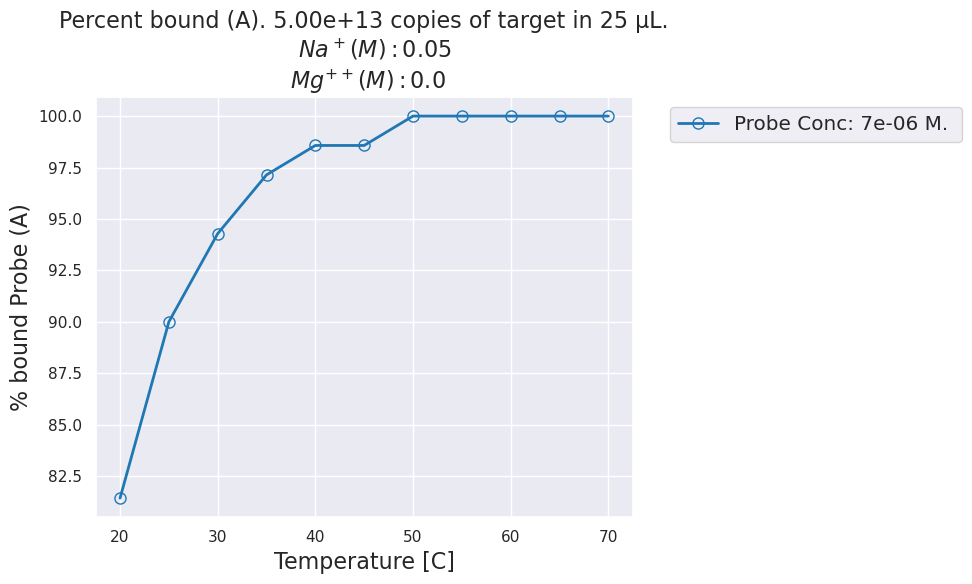

In [14]:
def run_all(fiveprime_strand='ATGC', nucleic_acid_type='dna', temperature_C=37, sampleVolume_uL=25,
                    concentration_A=[1e-09], concentration_B=[3e-09],
                    Na_M=1, Mg_M=0,  
                    species="A", savefig="no_save"):
    """Wrapper function for the entire nupack project.
    """
    concentration_A = make_list(concentration_A)
    concentration_B = make_list(concentration_B)
#     print('concentration_B' + str(concentration_B)) # Debugging
#     print(temperature_C)
    Results = run_analysis(fiveprime_strand, nucleic_acid_type, temperature_C,
                       Na_M, Mg_M,
                       concentration_A, concentration_B)

    print(report_parameters(Results)[0][5:-25]) # Displays results and information
    
    df_Nupack = make_dataFrame_from_results(Results) # Nupack results: ΔG, pfunc, concentrations, more...
    
    temp_concBound = make_sorted_df(df_Nupack, concentration_A, concentration_B) # % bound dataframe
    
    # B = [B]*V*NA with [B]:mol/L, V:volume in L, and NA as 6.022e23 copies/mol
    targetAmount = convert_concentration_to_copy_number(concentration_B[0], sampleVolume_uL) 
    
    fig = plot_experiment(temp_concBound, concentration_A, sampleVolume_uL, targetAmount, species)
    
    if str(savefig).lower() == "save":
        save_fig(fig)
    else:
        pass 
    
    return Results, df_Nupack, temp_concBound

## Demo
temp_start = 20
temp_stop = 70
increment = 5
temperatureC = list(range(temp_start,temp_stop+1,increment))

Results, df_Nupack, temp_concBound = run_all('TTTATCCGATGATGATGGCATCCCTTATTTA', 'dna',temperatureC,25,
                 7e-06, 3e-06,
                 0.05, 0)


# run_all(fiveprime_strand, nucleic_acid_type, temperatureC,
#                  Na_M, Mg_M,  
#                  concentration_A, concentration_B)

In [15]:
df_Nupack

,Material,TempC,Na_M,Mg_M,A_Conc_M,B_Conc_M,AA_Conc_M,AB_Conc_M,BB_Conc_M,ΔG_A,ΔG_B,ΔG_AA,ΔG_AB,ΔG_BB,Pfunc_A,Pfunc_B,Pfunc_AA,Pfunc_AB,Pfunc_BB
0,DNA,20,0.05,0.0,3e-06,3e-08,5.1e-08,5.7e-06,6.3e-07,-3.9,-15,-14,-3.3,-15,7.7e+2,1.0e+11,3.9e+10,3.0e+2,9.4e+10
1,DNA,25,0.05,0.0,3e-06,2e-08,2.9e-08,6.3e-06,3.6e-07,-3.4,-14,-13,-2.8,-13,3.2e+2,1.0e+10,3.4e+9,1.2e+2,7.5e+9
2,DNA,30,0.05,0.0,3e-06,9e-09,1.8e-08,6.6e-06,2e-07,-3,-13,-12,-2.4,-12,1.5e+2,1.3e+9,4.2e+8,55,7.6e+8
3,DNA,35,0.05,0.0,3e-06,6e-09,1.3e-08,6.8e-06,1.1e-07,-2.6,-12,-11,-2,-11,74,2.0e+8,7.3e+7,28,9.6e+7
4,DNA,40,0.05,0.0,3e-06,4e-09,1e-08,6.9e-06,5.6e-08,-2.3,-11,-10,-1.7,-10,40,3.6e+7,1.7e+7,15,1.5e+7
5,DNA,45,0.05,0.0,3e-06,2e-09,8.4e-09,6.9e-06,3e-08,-2,-10,-9.8,-1.4,-9.5,24,8.2e+6,5.1e+6,9.5,3.1e+6
6,DNA,50,0.05,0.0,3e-06,2e-09,7.3e-09,7e-06,1.7e-08,-1.8,-9.4,-9.3,-1.2,-8.8,15,2.3e+6,1.9e+6,6.5,8.3e+5
7,DNA,55,0.05,0.0,3e-06,1e-09,6.6e-09,7e-06,1.1e-08,-1.5,-8.9,-8.9,-1,-8.2,10,7.8e+5,8.8e+5,4.9,2.9e+5
8,DNA,60,0.05,0.0,3e-06,9e-10,6.1e-09,7e-06,8e-09,-1.3,-8.4,-8.6,-0.9,-7.8,7.6,3.3e+5,4.7e+5,3.9,1.3e+5
9,DNA,65,0.05,0.0,3e-06,8e-10,5.9e-09,7e-06,6.6e-09,-1.2,-8.1,-8.5,-0.79,-7.6,5.8,1.7e+5,2.9e+5,3.3,7.8e+4


In [16]:
temp_concBound[0]

,TempC,Na_M,Mg_M,percent_bound_A,percent_bound_B,AB_Conc_M,A_Conc_M,B_Conc_M
0,20.0,0.05,0.0,81.428571,190.000000,0.000006,0.000003,3.000000e-08
1,25.0,0.05,0.0,90.000000,210.000000,0.000006,0.000003,2.000000e-08
2,30.0,0.05,0.0,94.285714,220.000000,0.000007,0.000003,9.000000e-09
3,35.0,0.05,0.0,97.142857,226.666667,0.000007,0.000003,6.000000e-09
4,40.0,0.05,0.0,98.571429,230.000000,0.000007,0.000003,4.000000e-09
5,45.0,0.05,0.0,98.571429,230.000000,0.000007,0.000003,2.000000e-09
6,50.0,0.05,0.0,100.000000,233.333333,0.000007,0.000003,2.000000e-09
7,55.0,0.05,0.0,100.000000,233.333333,0.000007,0.000003,1.000000e-09
8,60.0,0.05,0.0,100.000000,233.333333,0.000007,0.000003,9.000000e-10
9,65.0,0.05,0.0,100.000000,233.333333,0.000007,0.000003,8.000000e-10


# Main interface (users input parameters here!)

Type in your parameters here and run the cell to get your results.



* ####  Fiveprime_strand: Your strand (Note: right now the 3' stand is automatically generated)
* #### Nucleic acid type: RNA or DNA
* #### Temperature start (˚C)
* #### Temperature stop (˚C)
* #### Temperature interval (˚C)
* #### Concentration A (M): Probe
* #### Sample volume (μL)
* #### Target/template copy number
* #### Sodium concentration (M). Does not yet have list compatibility.
* #### Magnesium concentration (M). Does not yet have list compatibility.
* #### Species: Use "A" for percent bound probe
* #### Species: Use "B" for percent bound target/template
* #### Saving figures: If you want to save include "save", otherwise it doesn't matter what you put.


Number of tubes: 12
372 number of conditions
 Na+: 1M,  Mg++: 0M, 


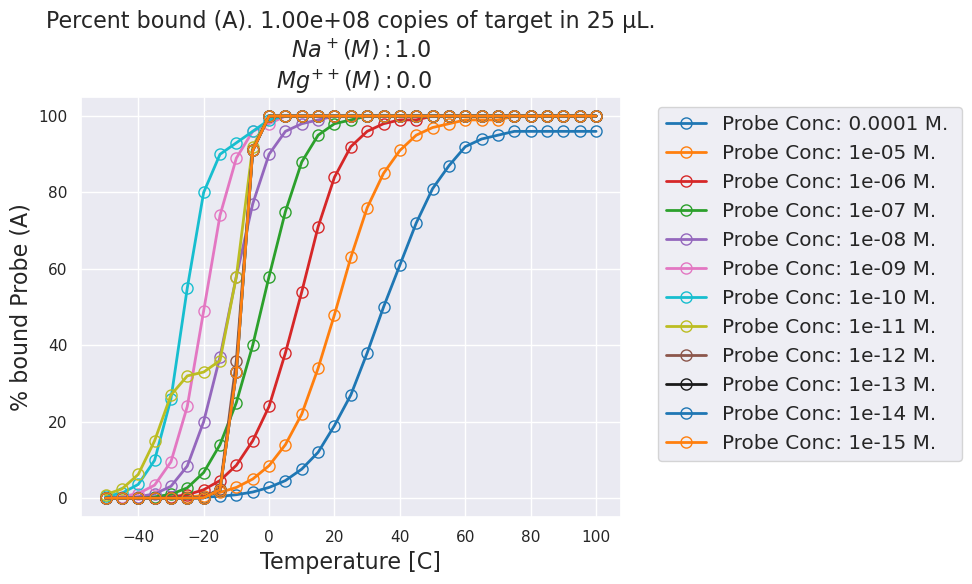

Figure saved


In [17]:
fiveprime_strand = 'TTTATCCGATGATGATGGCATCCCTTATTTA'
nucleic_acid_type ='dna'

temp_start = -50
temp_stop = 100
temp_interval = 5
temperatureC = list(range(temp_start,temp_stop+1,temp_interval))

# Capture probe
concentration_A = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15] # Capture probe

# Sample volume
sampleVolume_uL = 25

# Template copy number
targetAmount = 10e7 

## ¡Don't change! If you know the exact concentration(s), just feed them into "run_all"
concentration_B = [convert_copy_number_to_concentration(sampleVolume_uL,targetAmount)] # Default: Target 1000 RNA's in 25μL

# Salt concentration
Na_M = 1
Mg_M = 0

# Species/strand "A" or "B"
species = "A"

# Fig saving command here! use: "Save" to save a figure. Use anything else not to save. Ex  "Aliens are coming!" or leave blank
save_figure = "Save"

# run_all() # Works with no inputs for default values. boom

## Example 
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             nucleic_acid_type, 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             species,save_figure)

In [18]:
df_Nupack

,Material,TempC,Na_M,Mg_M,A_Conc_M,B_Conc_M,AA_Conc_M,AB_Conc_M,BB_Conc_M,ΔG_A,ΔG_B,ΔG_AA,ΔG_AB,ΔG_BB,Pfunc_A,Pfunc_B,Pfunc_AA,Pfunc_AB,Pfunc_BB
0,DNA,-50,1.0,0.0,4e-25,3e-40,6.6e-12,5e-10,5e-05,-14,-40,-55,-15,-47,1.4e+14,2.5e+39,2.6e+53,9.9e+14,1.0e+46
1,DNA,-50,1.0,0.0,1e-24,3e-39,6.6e-12,1.6e-10,5e-06,-14,-40,-55,-15,-47,1.4e+14,2.5e+39,2.6e+53,9.9e+14,1.0e+46
2,DNA,-50,1.0,0.0,4e-24,3e-38,6.6e-12,5e-11,5e-07,-14,-40,-55,-15,-47,1.4e+14,2.5e+39,2.6e+53,9.9e+14,1.0e+46
3,DNA,-50,1.0,0.0,1e-23,3e-37,6.6e-12,1.6e-11,5e-08,-14,-40,-55,-15,-47,1.4e+14,2.5e+39,2.6e+53,9.9e+14,1.0e+46
4,DNA,-50,1.0,0.0,4e-23,3e-36,6.6e-12,5e-12,5e-09,-14,-40,-55,-15,-47,1.4e+14,2.5e+39,2.6e+53,9.9e+14,1.0e+46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,DNA,100,1.0,0.0,7e-12,5e-21,3.5e-20,1e-11,2e-20,-1.3,-9.2,-9.8,-0.9,-8.7,6.1,2.4e+5,5.8e+5,3.4,1.2e+5
368,DNA,100,1.0,0.0,7e-12,5e-21,3.5e-21,1e-12,2e-22,-1.3,-9.2,-9.8,-0.9,-8.7,6.1,2.4e+5,5.8e+5,3.4,1.2e+5
369,DNA,100,1.0,0.0,7e-12,5e-21,3.5e-22,1e-13,2e-24,-1.3,-9.2,-9.8,-0.9,-8.7,6.1,2.4e+5,5.8e+5,3.4,1.2e+5
370,DNA,100,1.0,0.0,7e-12,5e-21,3.5e-23,1e-14,2e-26,-1.3,-9.2,-9.8,-0.9,-8.7,6.1,2.4e+5,5.8e+5,3.4,1.2e+5


In [19]:
temp_concBound[0]

,TempC,Na_M,Mg_M,percent_bound_A,percent_bound_B,AB_Conc_M,A_Conc_M,B_Conc_M
0,-50.0,1.0,0.0,0.0005,7.530120e+03,5.000000e-10,4.000000e-25,3.000000e-40
1,-45.0,1.0,0.0,0.0013,1.957831e+04,1.300000e-09,4.000000e-24,2.000000e-38
2,-40.0,1.0,0.0,0.0038,5.722892e+04,3.800000e-09,3.000000e-23,7.000000e-37
3,-35.0,1.0,0.0,0.0110,1.656627e+05,1.100000e-08,3.000000e-22,2.000000e-35
4,-30.0,1.0,0.0,0.0320,4.819277e+05,3.200000e-08,2.000000e-21,8.000000e-34
5,-25.0,1.0,0.0,0.0880,1.325301e+06,8.800000e-08,2.000000e-20,2.000000e-32
6,-20.0,1.0,0.0,0.2200,3.313253e+06,2.200000e-07,2.000000e-19,9.000000e-31
7,-15.0,1.0,0.0,0.4700,7.078313e+06,4.700000e-07,2.000000e-18,4.000000e-29
8,-10.0,1.0,0.0,0.9000,1.355422e+07,9.000000e-07,2.000000e-17,2.000000e-27
9,-5.0,1.0,0.0,1.6000,2.409639e+07,1.600000e-06,3.000000e-16,9.000000e-26


### We can also check percent bound of target instead of percent bound probe

Number of tubes: 12
372 number of conditions
 Na+: 1M,  Mg++: 0M, 


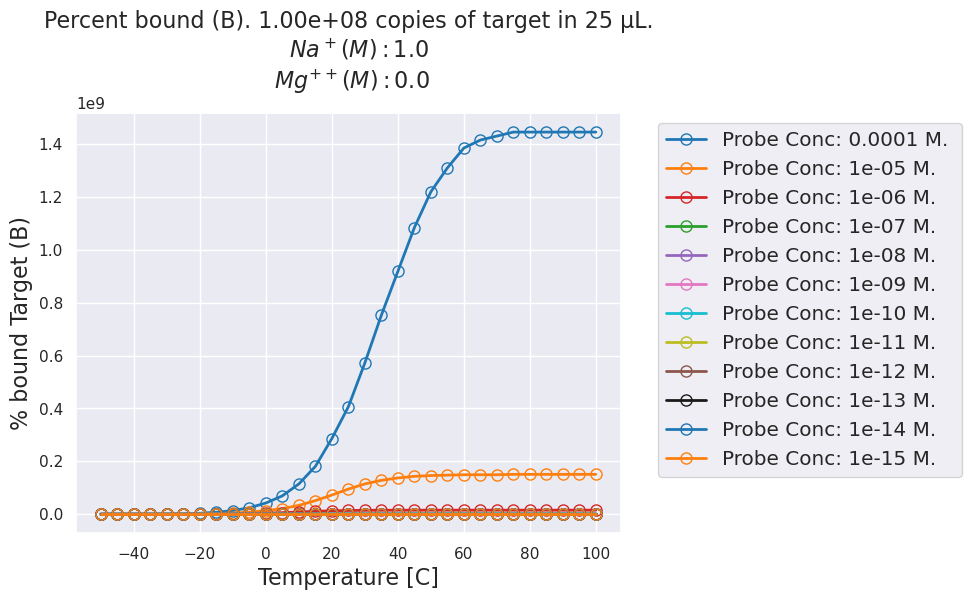

In [20]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             nucleic_acid_type, 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "B","noSave")

## Comments

## Running same experiments but with RNA instead of DNA

Number of tubes: 12
372 number of conditions
 Na+: 1M,  Mg++: 0M, 


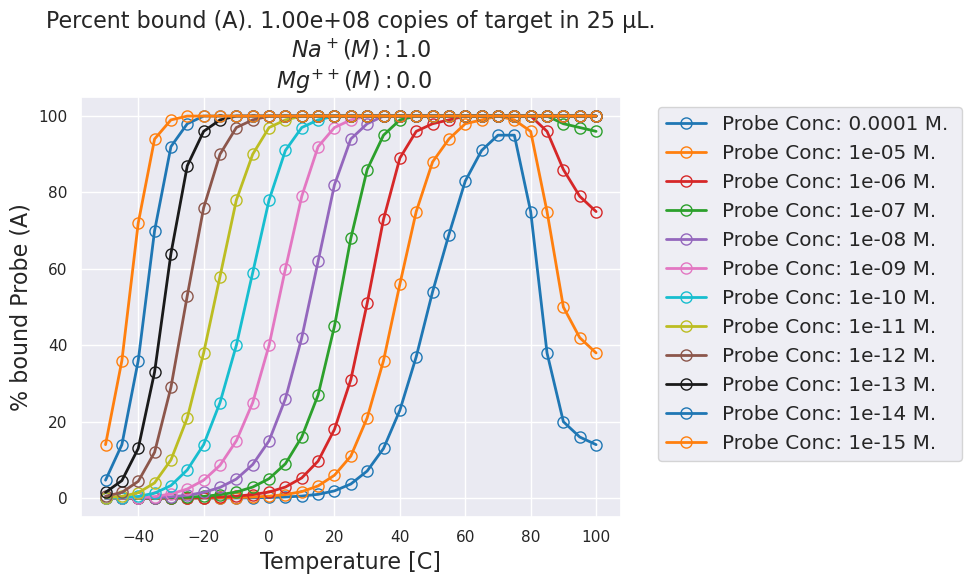

In [21]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             'RNA', 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "A","noSave")

## Checking percent bound of target instead of percent bound probe for RNA

Number of tubes: 12
372 number of conditions
 Na+: 1M,  Mg++: 0M, 


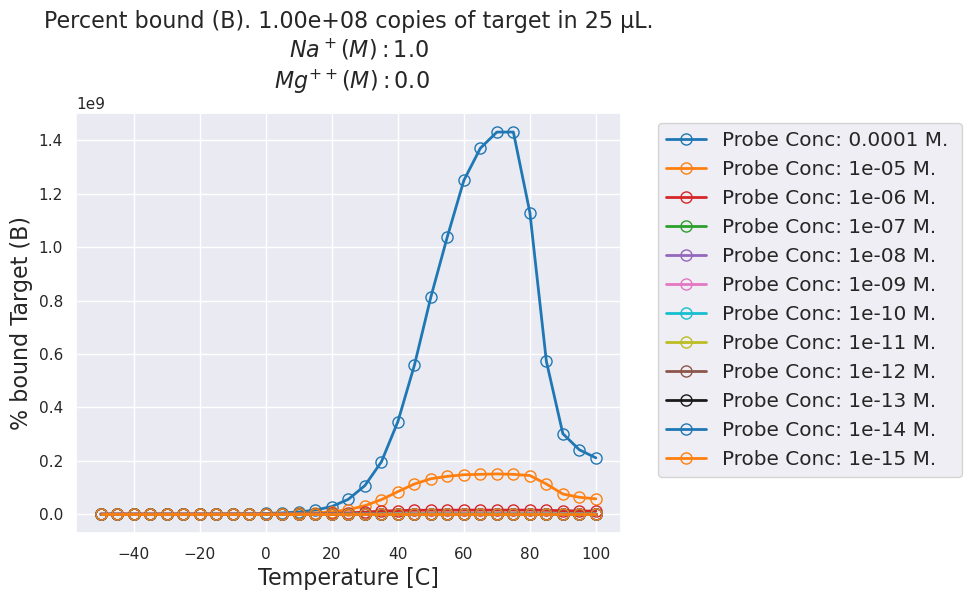

In [22]:
Results, df_Nupack, temp_concBound = run_all(fiveprime_strand, 
                                             'RNA', 
                                             temperatureC, 
                                             sampleVolume_uL,
                                             concentration_A,
                                             concentration_B,
                                             Na_M, Mg_M,
                                             "B","noSave")

### Use the following two code cells to scroll through data

In [ ]:
pd.set_option("display.max_rows", None)
df_Nupack.head(0)


In [ ]:
df_Nupack

In [ ]:
def foo(num_strands=2):
    """Returns a list of strand names based on the input number of strands.
       Input: An integer representing the number of strands.
       Output: A list of strand names.
    """
    try:
        alphabet = [chr(i) for i in range(ord('A'), ord('Z')+1)]  # generate list of letters A-Z
        return [alphabet[i % 26] if i < 26 else alphabet[(i // 26) - 1] + alphabet[i % 26] for i in range(num_strands)]
    except IndexError as e:
        print(f"Error: {e}")
        return None



In [ ]:
print(foo(702))